## Pair Programming Intro Regresión Lineal

In [1]:


# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [2]:
df = pd.read_csv("../datos/sephora_website_dataset4.csv", )
df.head()

,id,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
0,2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1,2
1,2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
2,1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
3,1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
4,2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,-0.098004,1.252763,1.870829,NaN,1,2


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

In [3]:
df.drop(columns=["rating_norm","rating_log","rating_raiz"], inplace=True)

In [4]:
df.head(3)

,id,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
0,2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,NaN,1,2
1,2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,NaN,1,2
2,1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,NaN,1,2


In [5]:
df.drop(columns=['category', 'MarketingFlags' , 'MarketingFlags_content'], inplace = True)

- Deberéis separar la X y la y.

In [6]:
X = df.drop("rating_minmax", axis = 1)
y = df['rating']

- Deberéis crear el train y el test.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- Ajustar vuestro modelo.

In [8]:
lr = LinearRegression(n_jobs=-1)

In [9]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [10]:

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test)

In [11]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
2816,4.0,4.000000e+00,Train
4763,0.0,9.286862e-13,Train
4903,2.0,2.000000e+00,Train
7051,4.5,4.500000e+00,Train
8213,4.5,4.500000e+00,Train


In [12]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
2816,4.0,4.000000e+00,Train,2.657430e-12
4763,0.0,9.286862e-13,Train,-9.286862e-13
4903,2.0,2.000000e+00,Train,-2.606804e-13
7051,4.5,4.500000e+00,Train,2.767564e-12
8213,4.5,4.500000e+00,Train,3.925749e-13


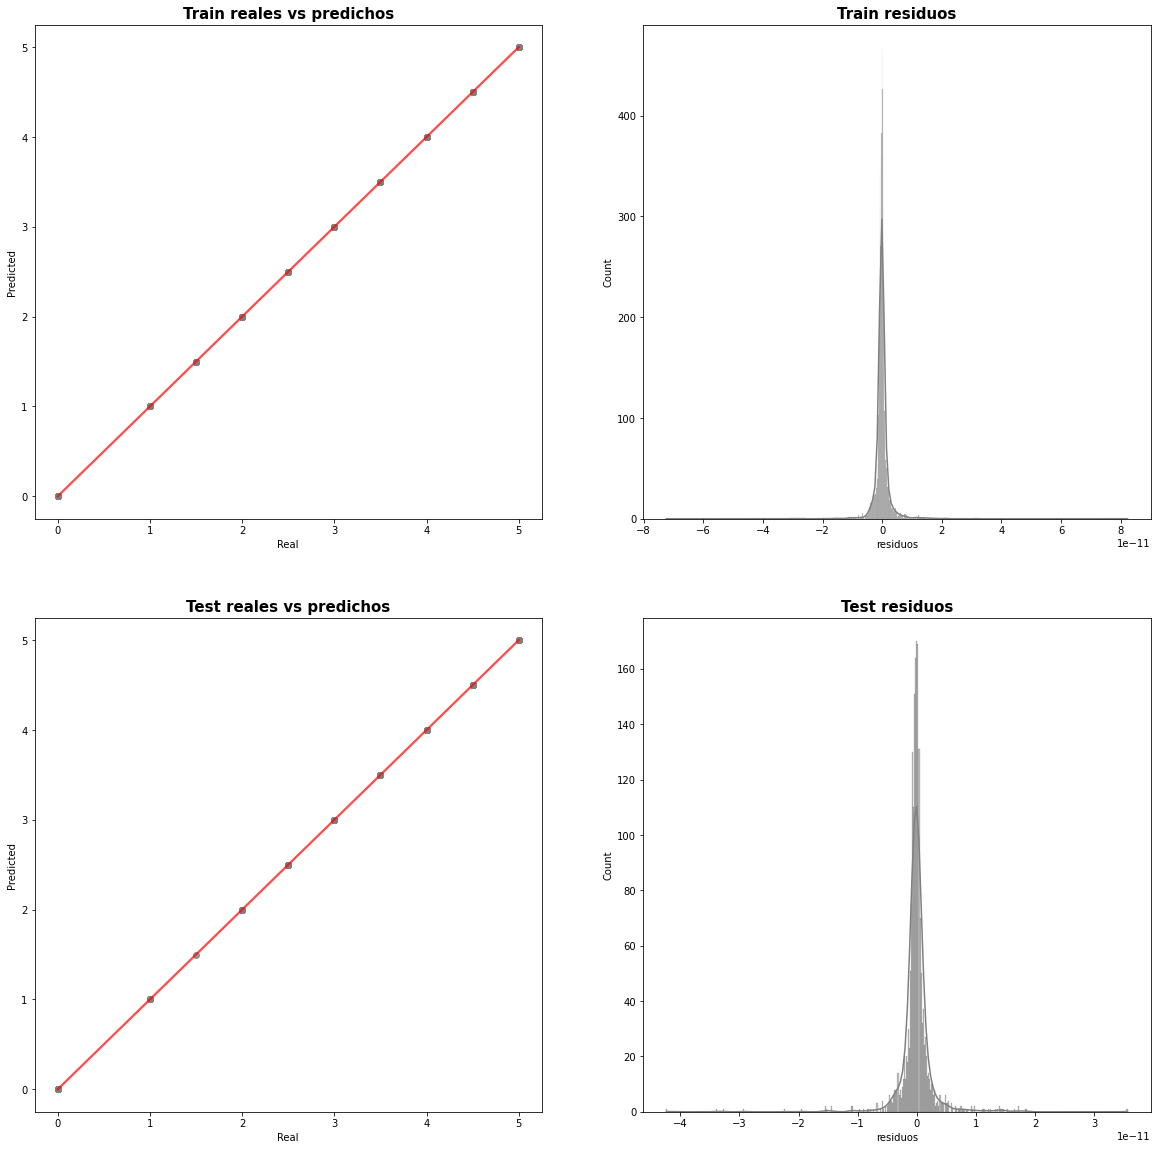

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [14]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-1.63639988e-11 -7.14963028e-12 -5.52817853e-12 -1.61358679e-12
 -1.80336192e-12 -6.55855438e-12 -2.19926782e-12 -8.77632209e-12
 -3.74954283e-12 -1.51055024e-11]
Média métricas de validación cruzada: -6.884794592302978e-12


In [15]:
# para saber que métricas podemos usar: 

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [16]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.047823,0.003433,1.0,-1.636400e-11
1,0.011868,0.003953,1.0,-7.149630e-12
2,0.016047,0.005930,1.0,-5.528179e-12
3,0.016578,0.014417,1.0,-1.613587e-12
4,0.031403,0.010718,1.0,-1.803362e-12
5,0.019173,0.013096,1.0,-6.558554e-12
6,0.025728,0.008160,1.0,-2.199268e-12
7,0.016836,0.004692,1.0,-8.776322e-12
8,0.022375,0.002642,1.0,-3.749543e-12
9,0.011948,0.010359,1.0,-1.510550e-11


In [17]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

AttributeError: 'float' object has no attribute 'round'